<a href="https://colab.research.google.com/github/Mafaz03/ReditScraper/blob/main/analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q praw
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import praw
import pandas as pd
from tqdm import tqdm
import requests
from PIL import Image
from torchvision import transforms
from io import BytesIO
import numpy as np
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.9 MB/s eta 0:00:00


In [2]:
pd.set_option('display.max_rows', None)

In [3]:
reddit = praw.Reddit(client_id = "uRyb_TFqvN7MbTU0cntBug",
            client_secret = "VAF_xUr-Q6h1JoZG-M8WE2RnLG8XlA",
            username = 'boyboyboi3',
            password = 'redditpassword03',
            redirect_uri = "http://localhost:8080",
            user_agent = "script by u/boyboyboi3",
            check_for_async=False)


In [4]:
def scrape_reddit(subreddit: str, limit = 10, sortby = 'year', show_safe = None):
  sub = reddit.subreddit(subreddit)
  result = []
  sub_itter = sub.top(sortby,limit = limit)
  for submission in tqdm(sub_itter):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.fromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['nsfw'] = submission.over_18
    try: d['image'] = submission.preview["images"][0]["source"]["url"]
    except: d['image'] = None
    try: d['author'] = submission.author.name
    except: d['author'] = 'Not Found'
    if show_safe == True and d['nsfw'] == True: d={}
    if show_safe == False and d['nsfw'] == False: d={}
    result.append(d)
  result = [item for item in result if item]
  return pd.DataFrame(result)

In [99]:
def show_images(links_, title = None, figsize=(15,15), sub_title=None, noframe=True,
                max_col = 6, max_size=500, max_images = None, fontsize = 10, **kwargs):
  transform = transforms.ToTensor()
  if isinstance(links_, str): links_ = [links_]
  if max_images: num_images = min(len(links_), max_images)
  else: num_images = len(links_)
  if num_images > 1:
    num_rows = (num_images - 1) // max_col + 1
    fig, axes = plt.subplots(num_rows, max_col, figsize=figsize)
    fig.suptitle(title)
    axes = axes.flatten()
  failed = 0
  links2 = []
  for link in links_:
    if link is not None: links2.append(link)
    else: failed+=1
  if max_images:
    if len(links2) < max_images:
      for link in links_:
        if len(links2) >= max_images: break
        elif link not in links2: links2.append(link)
    links = links2[:max_images]
  num_images = len(links)
  if sub_title:
    if isinstance(sub_title, str) and num_images == 1: sub_title = [sub_title]
    elif isinstance(sub_title, list) and len(sub_title) == num_images: pass
    elif isinstance(sub_title, str): sub_title = [sub_title] * num_images
    else: sub_title = [''] * num_images
  links = links[:num_images]
  print(f"Displaying {len(links)} images in total")
  for i, link in enumerate(links):
    try:
      response = requests.get(link)
      image = Image.open(BytesIO(response.content))
      image.thumbnail((max_size, max_size), Image.LANCZOS)
      if image.mode != 'RGB': image = image.convert('RGB')
      img_tensor = transform(image)
      if img_tensor.shape[0] == 3: img_tensor = img_tensor.permute(1, 2, 0)
      np_image = np.array(img_tensor)
      if num_images == 1:
        plt.imshow(np_image, **kwargs)
        if noframe: plt.axis('off')
        if sub_title: print("Since one image, it is best to set title in \'tilte\' parameter")
        return
      if sub_title:
        word = sub_title[i] if len(sub_title[i]) <= 45 else ""
        axes[i].set_title(word, fontsize = fontsize)
      axes[i].imshow(np_image, **kwargs)
      if noframe and max_images > 1:
        axes[i].axis('off')
    except: pass
  if max_images > 1:
    for j in range(i + 1, num_rows * max_col): axes[j].axis('off')
  print(f"{failed} post did not have images, or failed to fetch")
  plt.tight_layout()
  plt.show()

<ipython-input-4-0aaab9e1b7d0>:4: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  sub_itter = sub.top(sortby,limit = limit)
100it [00:20,  4.78it/s]


Displaying 18 images in total
5 post did not have images, or failed to fetch


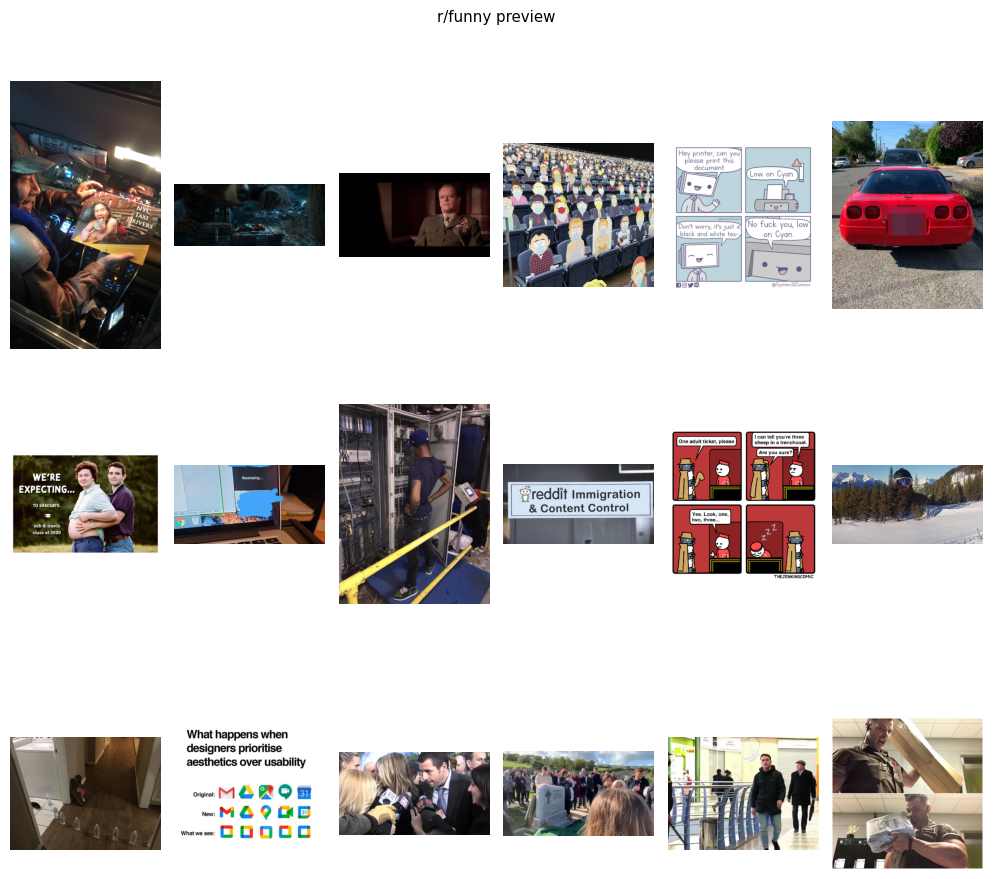

In [100]:
subreddit = "funny"
funny_result = scrape_reddit(subreddit, limit = 100, sortby = "all", show_safe = True)
show_images(list(funny_result.image), figsize = (10,10), max_images = 18, title = f"r/{subreddit} preview")

<ipython-input-4-0aaab9e1b7d0>:4: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  sub_itter = sub.top(sortby,limit = limit)
100it [00:50,  1.99it/s]


Displaying 18 images in total
14 post did not have images, or failed to fetch


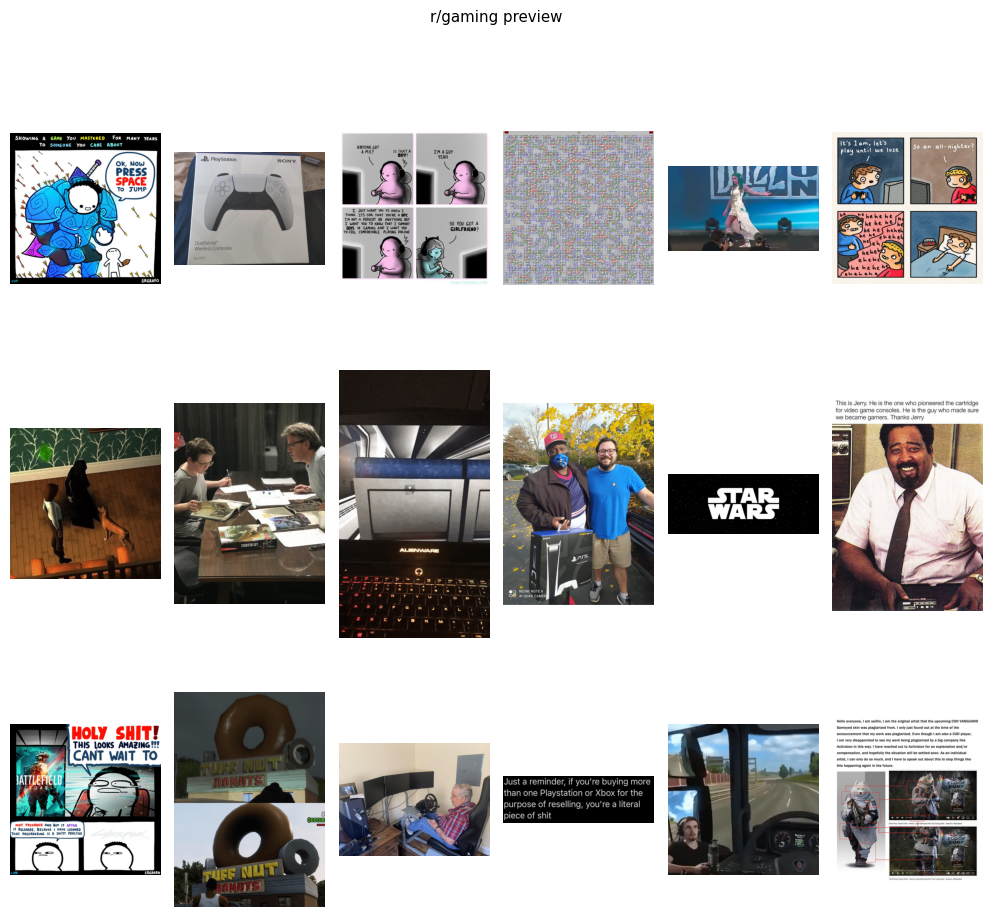

In [101]:
subreddit = "gaming"
gaming_result = scrape_reddit(subreddit, limit = 100, sortby = "all", show_safe = True)
show_images(list(gaming_result.image), figsize = (10,10), max_images = 18, title = f"r/{subreddit} preview")

In [109]:
subreddit = "aww"
aww_result = scrape_reddit(subreddit, limit = 100, sortby = "all", show_safe = True)
show_images(list(aww_result.image), figsize = (10,10), max_images = 18, title = f"r/{subreddit} preview")

<ipython-input-4-0aaab9e1b7d0>:4: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  sub_itter = sub.top(sortby,limit = limit)
100it [00:17,  5.71it/s]


Displaying 18 images in total
5 post did not have images, or failed to fetch


<ipython-input-4-0aaab9e1b7d0>:4: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  sub_itter = sub.top(sortby,limit = limit)
100it [00:47,  2.10it/s]


Displaying 18 images in total
14 post did not have images, or failed to fetch


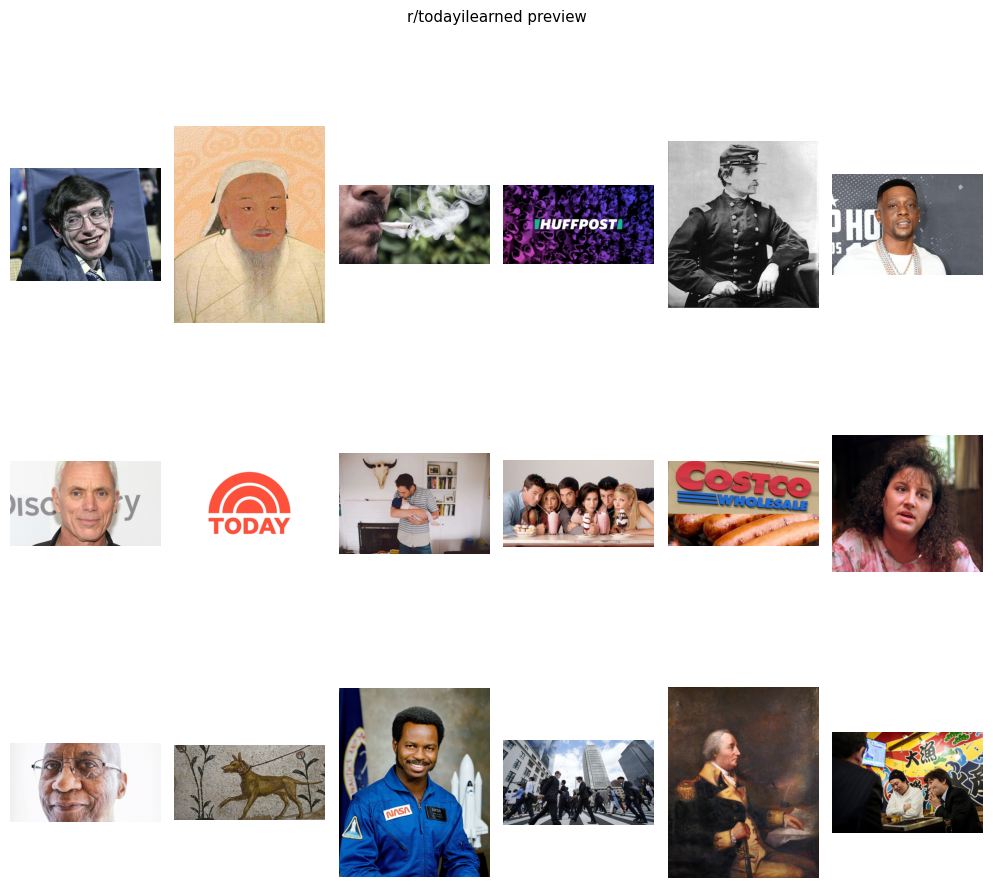

In [107]:
subreddit = "todayilearned"
todayilearned_result = scrape_reddit(subreddit, limit = 100, sortby = "all", show_safe = True)
show_images(list(todayilearned_result.image), figsize = (10,10), max_images = 18, title = f"r/{subreddit} preview")

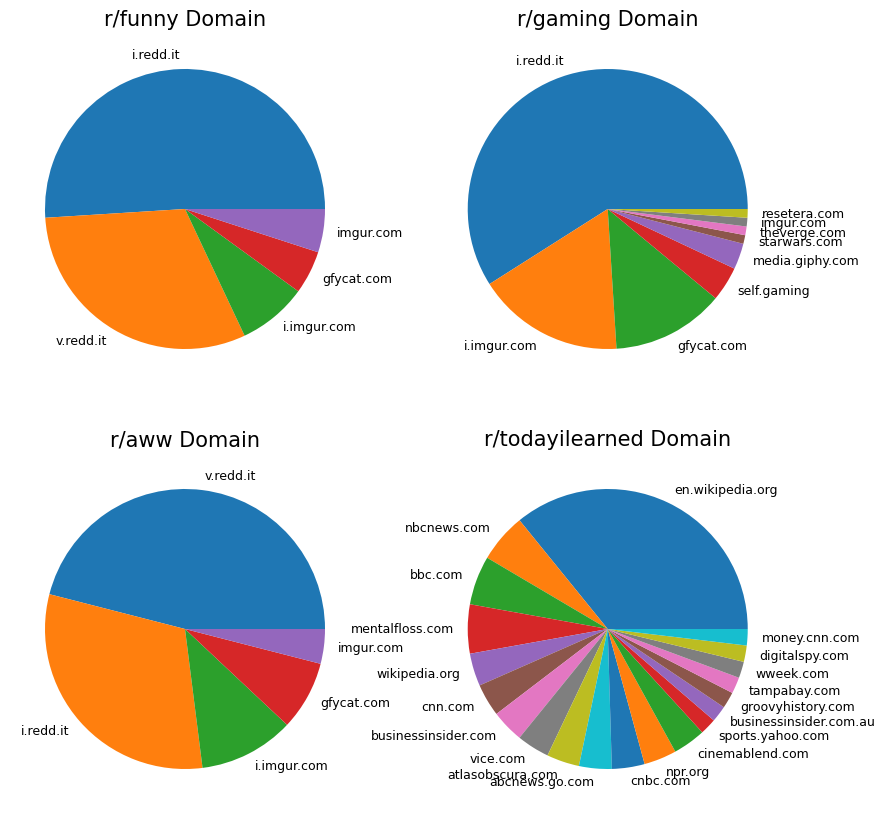

In [104]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 9
count_df_list = [funny_result, gaming_result, aww_result, todayilearned_result]
names = ["funny", "gaming", "aww", "todayilearned"]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
  domain_count_df = count_df_list[i].domain.value_counts()[:20].reset_index()
  ax = axes[i // 2, i % 2]
  ax.pie(x=list(domain_count_df['count']), labels=list(domain_count_df['domain']), )
  ax.set_title(f"r/{names[i]} Domain", fontsize = 15)
plt.show()

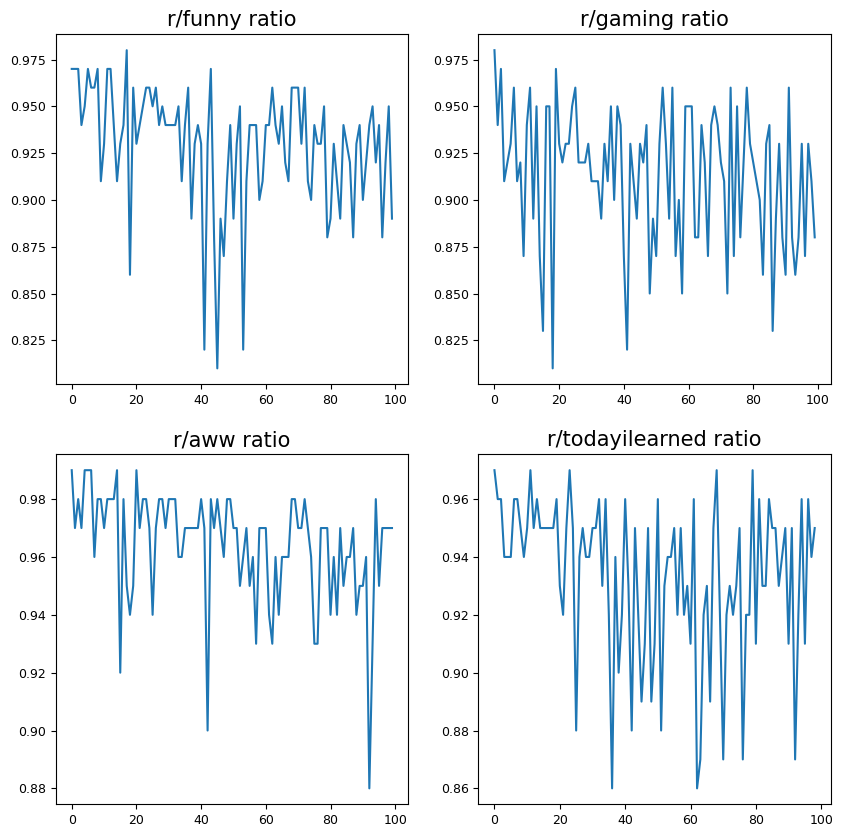

In [105]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 9

count_df_list = [funny_result, gaming_result, aww_result, todayilearned_result]
names = ["funny", "gaming", "aww", "todayilearned"]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
  ax = axes[i // 2, i % 2]
  ax.plot(count_df_list[i].upvote_ratio)
  ax.set_title(f"r/{names[i]} ratio", fontsize = 15)
plt.show()

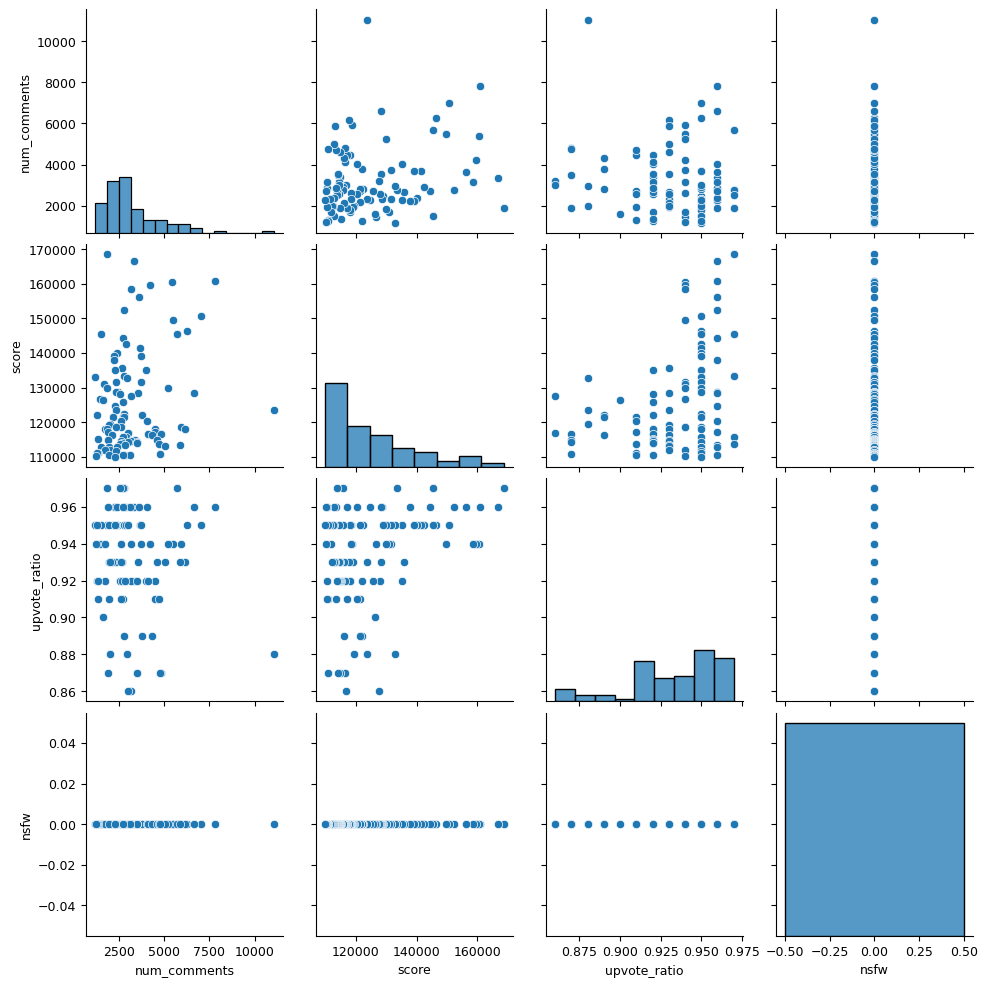

In [111]:
sns.pairplot(count_df_list[i])

<ipython-input-106-254701d6b361>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
<ipython-input-106-254701d6b361>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
<ipython-input-106-254701d6b361>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
<ipython-input-106-254701d6b361>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)


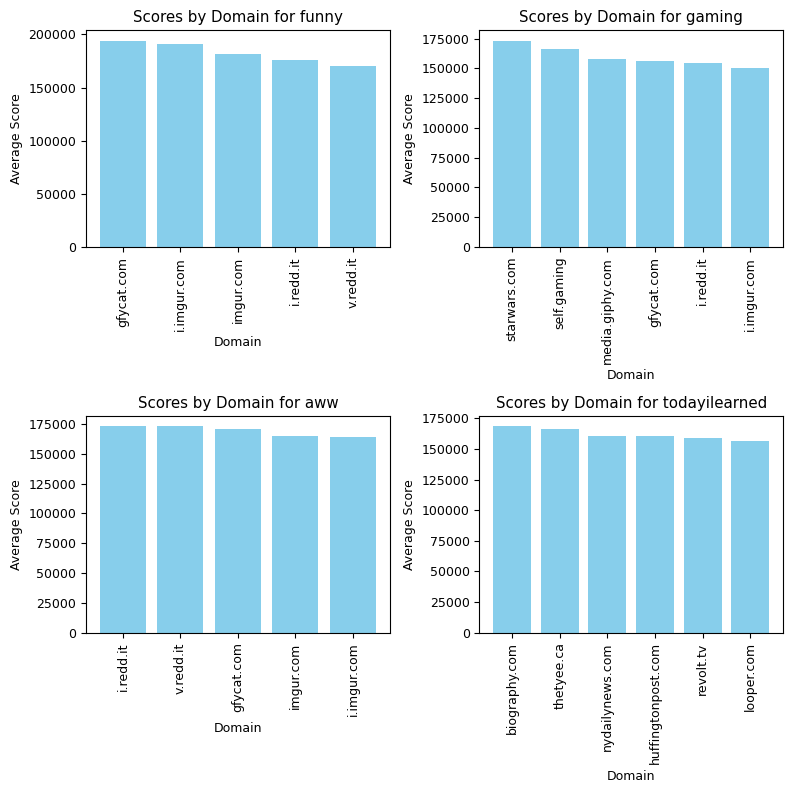

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    ax = axes[i // 2, i % 2]
    domain_vs_score_df = count_df_list[i].groupby('domain')['score'].mean().sort_values(ascending=False).reset_index()[:6]
    ax.bar(domain_vs_score_df['domain'], domain_vs_score_df['score'], color='skyblue')
    ax.set_xlabel('Domain')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Scores by Domain for {names[i]}')
    ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
plt.tight_layout()
plt.show()

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    ax = axes[i // 2, i % 2]
    domain_vs_score_df = count_df_list[i].groupby('domain')['score'].mean().sort_values(ascending=False).reset_index()[:6]
    ax.bar(domain_vs_score_df['domain'], domain_vs_score_df['score'], color='skyblue')
    ax.set_xlabel('Domain')
    ax.set_ylabel('Average Score')
    ax.set_title(f'Scores by Domain for {names[i]}')
    ax.set_xticklabels(domain_vs_score_df['domain'], rotation=90)
plt.tight_layout()
plt.show()